# Imports

In [1]:
from IPython.display import Image
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
#import pandas as pd
import os
import sys
import math
from PIL import Image as IPIL
from numpy import asarray
import random as pyrand

from IPython.display import Image
import pygtrie

In [2]:
'''
    IS_kill_seed = False
    if len(list_seed) > minseed:        
        rand = np.random.default_rng().random()
        if rand < pkillseed:
            IS_kill_seed = True
    if IS_kill_seed:
        rand = np.random.default_rng().integers(0,len(list_seed))  
        this_row = list_seed[rand][0]
        this_col = list_seed[rand][1]
        while mIS_mod[this_row,this_col] != 0:
            mfulltext[this_row,this_col] = mfulltext_orig[this_row,this_col] 
            mIS_mod[this_row,this_col] = 0
            this_col += 1
        mIS_seedonline[this_row] = False
        list_seed.pop(rand)
'''

'\n    IS_kill_seed = False\n    if len(list_seed) > minseed:        \n        rand = np.random.default_rng().random()\n        if rand < pkillseed:\n            IS_kill_seed = True\n    if IS_kill_seed:\n        rand = np.random.default_rng().integers(0,len(list_seed))  \n        this_row = list_seed[rand][0]\n        this_col = list_seed[rand][1]\n        while mIS_mod[this_row,this_col] != 0:\n            mfulltext[this_row,this_col] = mfulltext_orig[this_row,this_col] \n            mIS_mod[this_row,this_col] = 0\n            this_col += 1\n        mIS_seedonline[this_row] = False\n        list_seed.pop(rand)\n'

$\newcommand{\be}[0]{ \begin{equation}}$
$\newcommand{\ee}[0]{ \end{equation}}$
$\newcommand{\ba}[0]{ \begin{eqnarray}}$
$\newcommand{\ea}[0]{ \end{eqnarray}}$

$\newcommand{\p}[0]{\left}$
$\newcommand{\q}[0]{\right}$

$\newcommand{\EE}[0]{ & = &}$

$\newcommand{\itb}[1]{\hspace{.0\textwidth}\rlap{#1}}$
$\newcommand{\tb}[1]{\hspace{.1\textwidth}\rlap{#1}}$

$\newcommand{\bd}[0]{\begin{description}}$
$\newcommand{\ed}[0]{\end{description}}$
$\newcommand{\ii}[0]{\item[\ \ \ \ \ \ \  - ] }$
$\newcommand{\iii}[0]{\item[\ \ \ \ \ \ \ \ \ \ \ \ \ \  - ] }$
$\newcommand{\iie}[0]{\item[\ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ ] }$
$\newcommand{\hf}[0]{\hfil\\}$

$\newcommand{\ddphi}[0]{\phi^{\prime\prime}}$
$\newcommand{\dphi}[0]{\phi^{\prime}}$
$\newcommand{\dG}[0]{G^{\prime}(t)}$
$\newcommand{\ta}[0]{\theta}$

$\newcommand{\pd}[0]{\partial}$

$\newcommand{\F}[2]{\frac{#1}{#2}}$
$\newcommand{\bol}[1]{\textbf{#1}}$
$\newcommand{\ita}[1]{\textit{#1}}$


# Set Parameters

In [3]:


img_name = 'triangle.bmp'
img_name = 'circle_1.bmp'

cgsizerow = 30
cgsizecol = 15

fill_int='.'
fill_ext='.'
len_ext_fill = 0

Nbigrows = 1
Nbigcols = 3

tmax=1000

Nalch=1

Nlayers=6
laymask = 0
laymod = 1
layfoundword = 2 
layforgenword = 3
layseed = 4
layseedlen = 5

# mint
# mint[0][ir][ic] : ISinmask       0: no, 1: yes
# mint[1][ir][ic] : ISmod          0: unchanged, 1: changed
# mint[2][ir][ic] : ISfoundword    0:no, 1: yes

# mint[3][ir][ic] : ISforgenword   0:no, 1-9: index in forgen word
# mint[4][ir][ic] : ISseed         0: no, 1: pot seed, 2: active seed, 3: ded seed
# mint[5][ir][ic] : ISseed         0: no, 1: pot seed, 2: active seed, 3: ded seed

# Trie, aux func, classes

In [4]:
#def load_words():
#    with open('words_alpha.txt') as word_file:
#        valid_words = set(word_file.read().split())
#    return valid_words



with open('google-10000-english-usa.txt') as word_file:
        valid_words = set(word_file.read().split())

def fcheckword(this_word):
    return (this_word in valid_words)

print(fcheckword('tw'))


trie = pygtrie.CharTrie()
for word in valid_words:
    trie[word] = True


def PR(printthisword):
    print(printthisword)


#class color:
#    DARKCYAN = '\033[36m'
#    RED = '\033[91m'
#    GREEN = '\033[92m'
#    YELLOW = '\033[93m'
#    BLUE = '\033[94m'
#    PURPLE = '\033[95m'
#    CYAN = '\033[96m'       
#    BOLD = '\033[1m'
#    UNDERLINE = '\033[4m'
#    END = '\033[0m'

class color:
    Bold       = "\033[1m"
    Dim        = "\033[2m"
    Underlined = "\033[4m"
    Blink      = "\033[5m"
    Reverse    = "\033[7m"
    Hidden     = "\033[8m"
    ResetAll   = "\033[0m"

    Default      = "\033[39m"
    Black        = "\033[30m"
    Red          = "\033[31m"
    Green        = "\033[32m"
    Yellow       = "\033[33m"
    Blue         = "\033[34m"
    Magenta      = "\033[35m"
    Cyan         = "\033[36m"
    LightGray    = "\033[37m"
    DarkGray     = "\033[90m"
    LightRed     = "\033[91m"
    LightGreen   = "\033[92m"
    LightYellow  = "\033[93m"
    LightBlue    = "\033[94m"
    LightMagenta = "\033[95m"
    LightCyan    = "\033[96m"
    White        = "\033[97m"

#print('')
#stest = 'ripe'
#print(trie.has_key(stest))
#print(trie.has_node(stest))
#print(trie.has_subtrie(stest))
#print(trie.keys(prefix=stest))

False


# Words

In [5]:
poem = 'reviver waking—waking is possible—possible is seeing—seeing space is there—there is space in words—works in you can hear—here you can everything stop—stop everything see the violence—violence the sea of filters—filters of and strife—strife and now rest—rest now'

#poem = 'one_ two_ three_ four_ five_ six_ seven_ eight nine ten eleven twelve thirteen fourteen fifteen sixteen'

#poem = 'waking_up_is_possible__ you_can_do_it__ make_sure_to_try__ all_of_the_meatloaf_and_fries__'

poem = 'a_regress_of_spheres_progressing__ hands_clasped__ bridging_the_voids__  between__ blood_travels_forward__ hope_travels_back__'

words = poem.split()

# Functions

## do image proc

In [6]:
def fdoimageproc(img_name):
    img = IPIL.open(img_name) # Load image
    
    imgarray = asarray(img)
    
    imgrmax=int(imgarray.shape[0])
    imgcmax=int(imgarray.shape[1])
    
    rmax=int(imgarray.shape[0]/cgsizerow + 1)
    cmax=int(imgarray.shape[1]/cgsizecol + 1)

    return imgrmax, imgcmax, rmax, cmax, imgarray

## do mask

In [7]:
def fdomask():     
    mtemp = np.zeros((Nrows,Ncols),dtype=int)
    
    rowmask = 0
    colmask = 0
    
    for row in range(0,imgrmax):
        if row % cgsizerow == 0:
            colmask = 0
            for col in range(0,imgcmax):            
                if col%cgsizecol==0:               
                    if imgarray[row,col,0] > 128:
                        #print(str(rowmask) + " " + str(colmask))
                        mask[rowmask,colmask]=0
                        pix = 0
                    else:
                        pix = 1
                        mask[rowmask,colmask]=1
    
                    colmask += 1
                    #print(pix,end='')
            rowmask+=1
            #print('')

    for ibigrow in range(0,Nbigrows):
        rowoffset = rowmask*ibigrow
        for irow in range(0,rowmask):
            iactrow =  rowoffset + irow
            for ibigcol in range(0,Nbigcols):  
                coloffset = colmask*ibigcol
                for icol in range(0,colmask):
                    iactcol = coloffset + icol
                    mtemp[iactrow,iactcol] = mask[irow,icol]

    
    return mask, mtemp
    
    #rmax=mask.shape[0] - 1
    #cmax=mask.shape[1] - 1

## make text

In [8]:

def fmaketext():       
    curr_shape=0

    if icase == 1:
        words = poemtot
    else:
        words = poemwords
    Nwords = len(words)
    i_inword = np.zeros(Nwords,dtype=int)      #current index in word per tile
    
    Nblankrows=0
    iword = 0
    if icase == 1:
        blankline=''
        for iblank in range(0,Ncolscreen):
            blankline+='.'
        for irow in range(0,2):
            li_fulltext.append(blankline)
    for kk in range(0,Nbigrows):          
        for i in range(0,rmax):
            this_line=''
            IS_blankrow = True
            for k in range(0,Nbigcols):           
                #for j in range(0,len_ext_fill):
                #    this_line = this_line + fill_ext                
                for j in range(0,cmax):
                    itile = kk*Nbigcols+k
                    if mask[i,j] == 0:
                        this_line = this_line + fill_int
                    else:
                        IS_blankrow = False
                        this_line = this_line + words[itile][i_inword[itile]]
                        i_inword[itile] += 1
                        if i_inword[itile] >= ( len(words[itile]) ):
                            i_inword[itile]=0
            if IS_blankrow:
                Nblankrows+=1
                thisblankrow = this_line
                #print('IS_blankrow: ' + this_line)
            if kk == 1 and IS_altrowoffset:
                li_this_line = list(this_line)
                loctemp = []
                for iitem in range(0,len(li_this_line)):
                    loctemp.append(li_this_line[iitem])
                #loctemp = li_this_line
                colshift = int(cmax/2.0)
                for icol in range(0,Nbigcols*cmax-colshift):
                    li_this_line[icol] = loctemp[icol+colshift]
                for icol in range(0,colshift):
                    li_this_line[icol+Nbigcols*cmax-colshift] = loctemp[icol]                    
                this_line = ''.join(li_this_line)
                #for j in range(0,len_ext_fill):
                #    this_line = this_line + fill_ext

            if IS_noblankrow:
                if not IS_blankrow: 
                    li_fulltext.append(this_line)
            else:
                li_fulltext.append(this_line)
    for irow in range(0,Nblankrows):
        li_fulltext.append(thisblankrow)
    if icase == 1:
        for irow in range(0,3):
            li_fulltext.append(blankline)

    
    return li_fulltext

## write HTML

In [9]:
def fdoHTML(pagename):
    fout = open(pagename,'w')
    
    fout.write('<HTML>\n')
    
    fout.write('<HEAD>\n')
    fout.write('<style> h1 {font-size: ' + str(nfontsize) + 'em; font-family: courier; font-style: regular; font-weight: normal;}')
    fout.write('html, body {margin: 0; height: 100%; overflow: hidden}')
    fout.write('</style>\n')
    fout.write('</HEAD>\n')
    
    fout.write('<BODY>')
    #fout.write('<CENTER>\n')
    fout.write('<H1>\n')

    #fout.write('<A href="./stat_reviver.html">reviver</A>&nbsp;&nbsp;')
    #fout.write('<A href="./stat_youandthen.html">you and then</A>&nbsp;&nbsp;')
    #fout.write('</BR>')

    iline = 0
    IS_linkline  = False
    for this_line in li_fulltext:
        IS_linkline  = False
        if iline == 7:
            fout.write('<A href="./stat_reviver.html">reviver</A>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;')
            IS_linkline = True
        if iline == 10:
            fout.write('<A href="./stat_youandthen.html">you and then</A>&nbsp;')
            IS_linkline = True
        if iline == 13:
            fout.write('<A href="./stat_level.html">level</A>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;')
            IS_linkline = True  
        if iline == 16:
            fout.write('<A href="./stat_eve.html">eve</A>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;')
            IS_linkline = True 
        if iline == 19:
            fout.write('<A href="./stat_tenet.html">tenet</A>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;')
            IS_linkline = True             
        if not IS_linkline:
            fout.write('&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;')            
        for ijk in range(0,len(this_line)):
            fout.write(this_line[ijk])
        fout.write('</BR>\n')
        iline+=1

    fout.write('</H1>\n')
    fout.write('</BODY>\n')
    
    fout.write('</HTML>\n')
    
    fout.close()
        

## load bigram probs

In [10]:
BG=open('bigram_A.txt','r')

nbg=np.zeros((26,26))


salphabet = 'a b c d e f g h i j k l m n o p q r s t u v w x y z'
            #0 1 2 3 4 5 6 7 8 9 1 1 2 3 4 5 6 7 8 9 2 1 2 3 4 5
msalphabet = salphabet.split()

iline=0
for this_line in BG:
    this_words = this_line.split()
    for icol in range(0,26):
        thisrow=ord( this_words[icol*2][0].lower() )  - 97
        thiscol=ord( this_words[icol*2][1].lower() )  - 97
        nbg[thisrow,thiscol] = this_words[icol*2+1]
        #print(nbg[iline,icol])
    iline += 1

if 1 == 1:
    print('{:6}'.format(' ') + ' ',end='')
    for irow in range(0,26):
        print('{:6}'.format(msalphabet[irow]) + ' ',end='')
    print('')
        
    for irow in range(0,26):
        print('{:6}'.format(msalphabet[irow]) + ' ',end='')
        for icol in range(0,26):
            print('{:5.4f}'.format(nbg[irow,icol]) + ' ',end='')
        print('')
    
    this_comb = np.zeros(26)
    this_psum = np.zeros(26)

    #posssible
    #ibl
    left = 8
    right = 11
    mprob = np.zeros(27)
    if 1 == 1:
        psum = 0
        for irow in range(0,26):
            leftchar = msalphabet[left]
            thischar = msalphabet[irow]
            rightchar = msalphabet[right]
            print(leftchar+thischar+rightchar+'  '
                  +'{:5.4f}'.format(nbg[left,irow])+'  '
                  +'{:5.4f}'.format(nbg[irow,right])+'  '
                  +'{:5.4f}'.format(nbg[left,irow]*nbg[irow,right]) + ' ' 
                  + '{:5.4f}'.format(psum))
            psum += nbg[left,irow]*nbg[irow,right]
            mprob[irow+1]=nbg[left,irow]*nbg[irow,right]

       a      b      c      d      e      f      g      h      i      j      k      l      m      n      o      p      q      r      s      t      u      v      w      x      y      z      
a      0.0030 0.2300 0.4480 0.3680 0.0120 0.0740 0.2050 0.0140 0.3160 0.0120 0.1050 1.0870 0.2850 1.9850 0.0050 0.2030 0.0020 1.0750 0.8710 1.4870 0.1190 0.2050 0.0600 0.0190 0.2170 0.0120 
b      0.1460 0.0110 0.0020 0.0020 0.5760 0.0000 0.0000 0.0010 0.1070 0.0230 0.0000 0.2330 0.0030 0.0020 0.1950 0.0010 0.0000 0.1120 0.0460 0.0170 0.1850 0.0040 0.0000 0.0000 0.1760 0.0000 
c      0.5380 0.0010 0.0830 0.0020 0.6510 0.0010 0.0010 0.5980 0.2810 0.0000 0.1180 0.1490 0.0030 0.0010 0.7940 0.0010 0.0050 0.1490 0.0230 0.4610 0.1630 0.0000 0.0000 0.0000 0.0420 0.0010 
d      0.1510 0.0030 0.0030 0.0430 0.7650 0.0030 0.0310 0.0050 0.4930 0.0050 0.0000 0.0320 0.0180 0.0080 0.1880 0.0020 0.0010 0.0850 0.1260 0.0030 0.1480 0.0190 0.0080 0.0000 0.0500 0.0000 
e      0.6880 0.0270 0.4770 1.1680 0.3780 0.1630 0

0.310882 0
0.023067 0.310882
0.104151 0.333949
0.009472 0.4381
0.20405 0.44757199999999997
0.013195000000000002 0.6516219999999999
0.015555 0.6648169999999999
2.6e-05 0.6803719999999999
0.009936 0.6803979999999998
0.0 0.6903339999999998
0.00047299999999999995 0.6903339999999998
0.24926399999999999 0.6908069999999997
0.00159 0.9400709999999997
0.155712 0.9416609999999996
0.30477499999999996 1.0973729999999997
0.023407 1.4021479999999997
0.0 1.4255549999999997
0.02709 1.4255549999999997
0.063168 1.4526449999999997
0.110054 1.5158129999999996


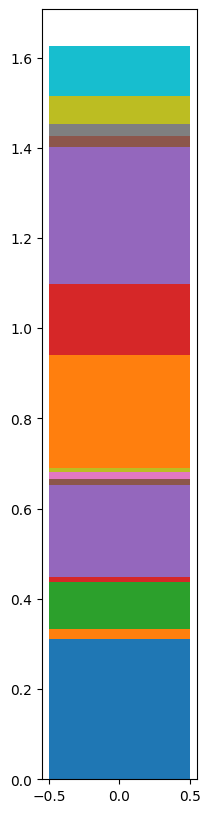

In [11]:

fig, ax = plt.subplots(figsize=(2,10))
bottom = np.zeros(26)

bottom=0
for i in range(0,20):
    print(str(mprob[i+1]) + ' ' + str(bottom))
    p = ax.bar(0,mprob[i+1], width=1, label='hi', bottom=bottom)
    bottom+=mprob[i+1]

## find new words

In [12]:
def ffindnewwords(IS_first,plist_startwords, mIS_foundword):

    list_newwords = []
    
    if IS_first:
        plist_startwords = []
    
    for irow in range(0,Nrows-1):
        Nlettinword=np.zeros(Ncols,dtype='int')
        for icol in range(1,Ncols-1):
            if mIS_foundword[irow,icol] == 0 and mIS_foundword[irow,icol-1] == 0:
                this_lettinword = 0
                this_str=''
                this_word=''
                if mfulltext[irow,icol].isalpha():
                               
                    this_str = mfulltext[irow,icol]                     #start char is alpha, so set this_str and Nlettersinword
                    this_lettinword = 1 
                    IS_prefix = True
                    IS_word = False
                    while(IS_prefix):                                #loop so find longest word starting with this char
                        prev_str = this_str                         #previous str before add more chars 
                        IS_prefix = False
    
                        if icol+this_lettinword < Ncols:
                            nextchar = mfulltext[irow,icol+this_lettinword]
                            #if icol+this_lettinword < Ncols and nextchar.isalpha():
                            if nextchar.isalpha():
                                this_str += nextchar
        
                                if(trie.has_subtrie(this_str)):            #If is prefix, keep going to find longest
                                    this_lettinword += 1
                                    IS_prefix=True
        
                                if trie.has_key(this_str):                 #Check all strings if words (ie, even if not longest)
                                    IS_word = True
                                    if IS_first:
                                        #print(str(irow) + ' ' + str(icol) + ' ' + str(this_lettinword) + ' ' + this_str)
                                        if this_str not in plist_startwords:
                                            plist_startwords.append(this_str)
    
                    if not IS_first:
                        if len(prev_str) > 2 and trie.has_key(prev_str):          #loop terminated so either longest word or prefix that is not a word
                            if prev_str not in plist_startwords and prev_str not in list_newwords:
                                list_newwords.append(prev_str)
                                #print(prev_str + ' ',end='')
                                Nlettinword[icol] = this_lettinword
                                for ilett in range(0,this_lettinword):
                                        mIS_foundword[irow,icol+ilett] = 1
    #print('')
    return plist_startwords

## swap

In [13]:
def fswap():
    row1=int(rnGen.integers(low=0, high=Nrows))
    col1=int(rnGen.integers(low=0, high=Ncols))
   
    row2=int(rnGen.integers(low=0, high=Nrows))
    col2=int(rnGen.integers(low=0, high=Ncols)) 
    temp = mfulltext[row1,col1]
    if IS_swapon:
        mfulltext[row1,col1]=mfulltext[row2,col2]
        mfulltext[row2,col2]=temp

## alch

In [14]:
def falch():
    
    testrow=int(rnGen.integers(low=1, high=Nrows-1))
    testcol=int(rnGen.integers(low=1, high=Ncols-1))    

    this_char = mfulltext[testrow,testcol]
    left_char = mfulltext[testrow,testcol-1]
    righ_char = mfulltext[testrow,testcol+1]
    
    this_alphind = ord(this_char) - 97
    left_alphind = ord(left_char) - 97
    righ_alphind = ord(righ_char) - 97

    loc_Nmod = 0
    this_psum = np.zeros(26)
    if left_alphind >=0 and left_alphind <26:
        if righ_alphind >=0 and righ_alphind <26:

            this_psum[0] = 0.0
            for ilett in range(1,26):
                pforw = nbg[left_alphind,ilett]
                pback = nbg[ilett,righ_alphind]
                this_psum[ilett] = this_psum[ilett-1] + nbg[left_alphind,ilett]*nbg[ilett,righ_alphind]
                
            psumtot = this_psum[26-1]

            rand = rnGen.random()*psumtot

            for ilett in range(0,25):
                if rand > this_psum[ilett] and rand <=  this_psum[ilett+1]:
                    new_char = chr(ilett+97+1)
                    mfulltext[testrow,testcol] = new_char
                    loc_Nmod += 1
                    mint[laymod,testrow,testcol] = 1
    return mint[laymod],mfulltext,loc_Nmod

## grow forward

In [15]:
#def fgrowforward(itime, mIS_seed):
def fgrowforward(itime):

    pnewseed=0.1

    irowpick = -1
    icolpick = -1
    
    IS_new_seed = False     
    rand = rnGen.random()
    if rand < pnewseed:
            IS_new_seed = True

    Npotseed = 0
    if IS_new_seed:        
        li_possseed=[]                                                    #Find pot seeds      
        for irow in range(0,Nrows):
            for icol in range(1,Ncols-1):
                cond1 = ( mfulltext[irow,icol-1] =='_' and mfulltext[irow,icol].isalpha() )
                #cond2 = (mfulltext[irow,icol-1] =='.' and mfulltext[irow,icol].isalpha())
                cond3 = (mint[layseed,irow,icol] < 2)
                #if mfulltext[irow,icol+1] != '.':
                #    print(mfulltext[irow,icol] + ' ' + mfulltext[irow,icol+1] )
                #    print(str(cond1) + ' ' + str(cond2) + ' ' + str(cond3) + ' ' )
                #if (cond1 or cond2) and cond3:
                if cond1 and cond3:
                        #print(str(irow) + ' ' + str(icol) + 'new seed!')
                        mint[layseed,irow,icol] = 1
                        li_possseed.append((irow,icol))          
                        Npotseed += 1
        #print('Npotseed: ' + str(Npotseed))
                
        if Npotseed > 0:
            #print('new seed!',flush=True)
            rand = rnGen.integers(0,Npotseed)             #Turn on pot seed
            irowpick = li_possseed[rand][0]
            icolpick = li_possseed[rand][1]
            mint[laymod,irowpick,icolpick] = 1
            mint[layseed,irowpick,icolpick] = 2
            mint[layseedlen,irowpick,icolpick] = 0
            #this_char = mfulltext[testrow,testcol]
            #mgrowwords.append(this_char + ' ')

    li_actiseed = []
    Nactiseed = 0                                                           #Find active seeds
    for irow in range(0,Nrows):
        for icol in range(0,Ncols):
            if mint[layseed,irow,icol] == 2 :
                li_actiseed.append((irow,icol))
                Nactiseed+=1
    #print('Npotseed: ' + str(Npotseed) + ' Nactiseed: ' + str(Nactiseed))

    
    if Nactiseed > 0:
        seedrow=0
        seedcol=0
        for iseed in range(0,Nactiseed):                                    #loop over active seeds
            if 1==1:
                seedrow=li_actiseed[iseed][0]
                seedcol=li_actiseed[iseed][1]
                seedlen = mint[layseedlen,seedrow,seedcol]

                this_str='' 
                idelta = 0
                for idelta in range(0,seedlen):
                    this_str += mfulltext[seedrow,seedcol+idelta]
                this_lastcol = seedcol+idelta
                
                if this_lastcol+1 < Ncols:

                    IS_cangrow = True                                          #check if forgenword can grow
                    if mint[laymask,seedrow,this_lastcol+1] == 0:             #out of shape area so ded seed
                        if (IS_writegrowlog):
                            fgrowlog.write('out of shape: ' + this_str)
                        IS_cangrow = False
                        mint[layseed,seedrow,seedcol] = 3
                        #print('iseed: ' + str(iseed) + ' ded')
    
                                                                    
                    if mint[layseed,seedrow,this_lastcol+1] > 1:              #ran into another seed (active or ded) so ded
                        if (IS_writegrowlog):
                            fgrowlog.write('collision! ' + str(iseed) + ' ' + this_str)                       
                        IS_cangrow = False
                        mint[layseed,seedrow,seedcol] = 3
                        #print('iseed: ' + str(iseed) + ' ded')
    
                    if IS_cangrow:
                        if trie.has_subtrie(this_str):                        #can grow, but is there a longer word or at end of branch?
                            li_prefix = trie.items(this_str)                  #list of possibilities for this prefix
                        
                            rand = rnGen.integers(0,len(li_prefix))
                            this_word = li_prefix[rand][0]
                            if iseed==0:
                                if (IS_writegrowlog):
                                    fgrowlog.write(this_str+'\n')                              
                                    fgrowlog.write('     '+str(len(li_prefix)) + ':  ')
                                    for i in range(0,len(li_prefix)):
                                        fgrowlog.write(li_prefix[i][0]+', ')
                                    fgrowlog.write('\n')                                
                                    fgrowlog.write('     '+this_word+'\n')
                                    fgrowlog.write(this_word[:len(this_str)+1]+'\n')
                                    fgrowlog.write('\n')
                            if len(this_word) > seedlen:                      #longer words so grow
                                #print(str(len(this_word)) + ' ' + str(len(this_str)))
                                #print(str(this_word) + ' ' + str((this_str)),flush=True)
                                mfulltext[seedrow,seedcol+seedlen] = this_word[seedlen]
                                mint[layseedlen,seedrow,seedcol] += 1
                                mint[laymod,seedrow,seedcol+seedlen] = 1
                                #if iseed == 0:
                                #print('this_str: ' + this_str,flush=True)
                                #print('this_word: ' + this_word,flush=True)
                                #print('newchar: ' + str(mfulltext[seedrow,seedcol+seedlen]),flush=True )
                                #print('seedlaylen: ' + str(mint[layseedlen,seedrow,seedcol]),flush=True )
                                #print('iseed: ' + str(iseed) + '  this_str: ' + this_str + '  this_word: ' + this_word,flush=True)
                                #mint[laymod,seedrow,seedcol+seedlen+1]
                        else:
                            #print('ded seed')
                            if (IS_writegrowlog):
                                fgrowlog.write('end of word: ' + this_str+'\n')
                            mint[layseed,seedrow,seedcol] = 3              #no longer words so ded
                            IS_needclear = True
                            ineedclear = 0
                            icolsub = seedcol+seedlen+ineedclear
                            while IS_needclear and icolsub < Ncols:
                                checkchar = mfulltext[seedrow,icolsub]
                                if checkchar != '_' and checkchar != '.':
                                    mfulltext[seedrow,seedcol+seedlen+ineedclear] = '_'
                                else:
                                    IS_needclear = False
                                ineedclear+=1
                                icolsub+=1
                    else:
                        if (IS_writegrowlog):
                            fgrowlog.write('end of line: ' + this_str+'\n')
                            
    fgrowlog.flush()
    return mfulltext, mint

## case params

In [16]:
def fdocaseparam(case):
    if case == 'swap':
        Nbigrows = 2
        Nbigcols = 3        
        Npanes=1
        Nalch = 10
        IS_showmod = False
        IS_showfoundword = True
    if case == 'alch':
        Nbigrows = 1
        Nbigcols = 1        
        Npanes=2
        Nalch = 10
        IS_showmod = False
        IS_showfoundword = True        
    if case == 'growforward':
        Nbigrows = 2
        Nbigcols = 3        
        Npanes=1
        Nalch = 10
        IS_showmod = True
        IS_showfoundword = False

    return Nbigrows, Nbigcols, Npanes, Nalch, IS_showmod, IS_showfoundword

## choose content

In [17]:
def fdochoosecontent():
    if ialgo == 0:
        ialgobeg = 0
        ialgoend = 3
    if ialgo == 1:
        ialgobeg = 0
        ialgoend = 1
    if ialgo == 2:
        ialgobeg = 1
        ialgoend = 2
    if ialgo == 3:
        ialgobeg = 2
        ialgoend = 3
        
    li_imgname = []
    li_imgname.append('triangle.bmp')
    li_imgname.append('circle_1.bmp')
    li_imgname.append('diamonds-tile01.bmp')
    li_imgname.append('one-diamond-tile01.bmp')
    #li_imgname.append('L-square-tile01.bmp')
    li_imgname.append('rectangles-tile01.bmp')
    li_imgname.append('star01.bmp')
    li_imgname.append('L-corner-tile01.bmp')
    li_imgname.append('tile-star-tess01.bmp')
    imgname = li_imgname[ishape]


    li_poemtit=[]
    li_poem=[]
    li_poemtot=[]
    #0
    li_poemtit.append('reviver')
    #spoem = 'dearest,_ waking_is_possible__ you_can_hear_the_space_in_words__'
    spoem = 'waking_is_possible__ you_can_hear_the_space_in_words__'
    spoemtot = 'waking_is_possible__you_can_hear_the_space_in_words__'
    li_poem.append((spoem + ' ' + spoem + ' ' + spoem))
    li_poemtot.append(spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot)

    #1
    li_poemtit.append('you and now')
    #spoem = 'dearest,_ waking_is_possible__ you_can_hear_the_space_in_words__'
    spoem = 'a_regress_of_spheres_progressing__ hands_clasped__ bridging_the_voids__ between__ blood_travels_forward__ hope_travels_back__'
    spoemtot = 'a_regress_of_spheres_progressing__hands_clasped_bridging_the_voids__between__blood_travels_forward__hope_travels_back__'
    li_poem.append((spoem + ' ' + spoem + ' ' + spoem))
    li_poemtot.append(spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot)

    #2
    li_poemtit.append('level')
    #spoem  = 'darling,_ snow_fields__ hide_and_reveal__ surface-depth__ always_already_there__'
    spoem  = 'snow_fields__ hide_and_reveal__ surface-depth__ always_already_there__'
    spoemtot  = 'snow_fields__hide_and_reveal__surface-depth__always_already_there__'
    li_poem.append(spoem + ' ' + spoem + ' ' + spoem)
    li_poemtot.append(spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot)
    
    #3
    li_poemtit.append('eve')
    #spoem='lieve,_ listen_for__ dreams_of_plants__ the_night_of_winter_solstice__'
    spoem='listen_for__ dreams_of_plants__ the_night_of_winter_solstice__'
    spoemtot='listen_for__dreams_of_plants__the_night_of_winter_solstice__'
    li_poem.append(spoem + ' ' + spoem + ' ' + spoem)
    li_poemtot.append(spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot)

    #4
    li_poemtit.append('tenet')
    #spoem='coco,__ at_night-time__ answers_are_simply_given__ they_taper_to_thin_whispers__'
    spoem='at_night-time__ answers_are_simply_given__ they_taper_to_thin_whispers__'
    spoemtot='at_night-time__answers_are_simply_given__they_taper_to_thin_whispers__'
    li_poem.append(spoem + ' ' + spoem + ' ' + spoem)
    li_poemtot.append(spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot + ' ' + spoemtot)
    
    poemtit = li_poemtit[ipoem]
    poemwords = li_poem[ipoem].split(' ')
    poemtot = li_poemtot[ipoem].split(' ')

    #print('li_poem[ipoem]: ' + li_poem[ipoem])
    #print('poemwords: ' + str(poemwords))

    # reviver
    # you and now
    # level
    # eve 
    # tenet 
    
    words = poem.split()  

    IS_altrowoffset = False
    IS_noblankrow = False
    if ishape == 2:
        #IS_altrowoffset = True
        IS_noblankrow = True    
    if ishape == 5:
        IS_altrowoffset = True
        IS_noblankrow = True

    return ialgobeg, ialgoend, imgname, poemtit, poemwords, poemtot, IS_altrowoffset, IS_noblankrow 

## print output

In [18]:
def fprintoutput():
            this_block = ''
            sintervaltime = str(int(itime/100.0)*100)
            print('live generation algorithm: ' + color.Yellow+color.Bold+case+color.ResetAll 
                  + '              random seed: ' + color.Yellow+color.Bold + rand_word +color.ResetAll  
                  + '              poem: ' + color.Yellow+color.Bold + poemtit+color.ResetAll #)
                    + '                                                            ' 
                  + color.Yellow+color.Bold + sintervaltime+color.ResetAll )
            for irow in range(0,Nrows):
            #for irow in range(0,39):
                if irow<41:
                    this_line = ''
                    for icol in range(0,Ncolbuff):
                        this_line += '.'
                    for ipane in range(0,Npanes):
                        for icol in range(0,Ncols):  
                            IS_default = True
                            if mint[layfoundword,irow,icol]==1:
                                if IS_showfoundword:
                                    this_line+=color.Blue+color.Bold+mfulltext[irow,icol]+color.ResetAll 
                                    IS_default = False
                                                                   
                            elif mint[laymod,irow,icol]>0:
                                if IS_showmod:
                                    this_line+=color.LightMagenta+color.Bold+mfulltext[irow,icol]+color.ResetAll
                                    IS_default = False
         
                            if IS_default:
                                if ipane == 1:                            
                                    this_line += '.'
                                else:
                                    this_line += mfulltext[irow,icol]
                    ilastcol=icol 
                    for icol in range(0,Ncolbuff):
                        this_line += '.'
                    this_block+=this_line+'\n'
                    #if irow==40:
                        #print(this_line,flush=True)
                    #else:
                        #print(this_line)
                    ilastrow = irow
            print(this_block)
            #for irow in range(ilastrow,Nrowscreen):
            #    this_line = ''
            #    for icol in range(0,Ncolscreen):
            #        this_line += '.'                
            #    print(this_line)

## html setup

In [19]:
    ###################################
def fhtmlsetup(ipair):
    IS_keepgoing = True
    if IS_htmlonly:
        aspratrow = 28
        aspratcol = 16    
        nfontsize=1.5
        
        icase=1

        if ipair ==0:
            ishape=6
            ipoem=0
            shtmlfilename = 'stat_reviver.html'
        if ipair ==1:    
            ishape=1
            ipoem=1    
            shtmlfilename = 'stat_youandthen.html'
        if ipair ==2:    
            ishape=7
            ipoem=2    
            shtmlfilename = 'stat_level.html'
        if ipair ==3:    
            ishape=2
            ipoem=3    
            shtmlfilename = 'stat_eve.html'  
        if ipair ==4:    
            ishape=5
            ipoem=4    
            shtmlfilename = 'stat_tenet.html'
            IS_keepgoing = False
        
        tmax = 1        

        return aspratrow, aspratcol, nfontsize, icase, ishape, ipoem, shtmlfilename, tmax, IS_keepgoing
    ###################################

# Dynamic Code

In [20]:
from IPython.display import clear_output
import time
import string

aspratrow = 28
aspratcol = 13
cgsizerow = 50
cgsizecol = int(float(cgsizerow)*(aspratcol/aspratrow))
fill_int='.'
fill_ext='.'
len_ext_fill = 0
nfontsize=2.0

###########################################################################
# Pick Algorithm:
# 0     cycle through all, 
#1     swap, 
#2     alch, 
#3     growforward
ialgo = 2


# Pick Shape:
# 0 triangle, 1 circle, 2 diamonds, 3 1 diamond, 4 rectangle, 5 star, 6 L corner, 7 star tess
ishape = 1


# Pick Poem:
# 0 reviver, 1 you and now, 2 level, 3 eve, 4 tenet
ipoem = 3

# star - reviver, circle - you and then, L corner - level, diamonds - eve, rectangle - tenet
###########################################################################

IS_swapon = True
IS_htmlonly = False
IS_writegrowlog = False

tmax=1000

Ncase = 3

Nrowscreen = 45
Ncolscreen = 180
Ncolscreen = 155

rand = np.random.default_rng().integers(0,len(valid_words))
rand_word = list(valid_words)[rand]
rnGenseed = pyrand.seed(rand_word)
rnGen = np.random.default_rng(seed=rnGenseed)

IS_keepgoing = True

ipair = 0
iiter = 0

fgrowlog = open('grow.log','w')

while IS_keepgoing:

    if IS_htmlonly:
        aspratrow, aspratcol, nfontsize, icase, ishape, ipoem, shtmlfilename, tmax, IS_keepgoing = fhtmlsetup(ipair)
        ipair += 1
    
    ialgobeg, ialgoend, imgname, poemtit, poemwords, poemtot, IS_altrowoffset, IS_noblankrow = fdochoosecontent()
    IS_keepgoing = False
    
    #ialgobeg=0
    #ialgoend=3
    for icase in range(ialgobeg,ialgoend):       
        #ialgo = 0
        #ishape = rnGen.integers(1,7)
        #ipoem = rnGen.integers(0,4)

        #ishape=7

        ialgobeg, ialgoend, imgname, poemtit, poemwords, poemtot, IS_altrowoffset, IS_noblankrow = fdochoosecontent()      
        
        Nmod = 0
        loc_Nmod = 0
        
        if icase == 0:
            case = 'swap'
            cgsizerow = 50
        if icase == 1:
            case = 'alch'
            cgsizerow = 28
        if icase == 2:
            case = 'growforward'
            cgsizerow = 50

        cgsizecol = int(float(cgsizerow)*(aspratcol/aspratrow))      
        Nbigrows, Nbigcols, Npanes, Nalch, IS_showmod, IS_showfoundword = fdocaseparam(case)  
        imgrmax,imgcmax, rmax,cmax, imgarray = fdoimageproc(imgname)
        
        Nrows = (rmax)*Nbigrows
        if icase==1:
            Nrows+=5
        Ncols = (cmax)*Nbigcols      

        Ncolbuff = int((Ncolscreen - Ncols*Npanes)/2.0)

        #if iiter==0:
        mint = np.zeros((Nlayers,Nrows,Ncols),dtype=int) 
        mfulltext = np.zeros((Nrows,Ncols),dtype=str)
        mfulltext_orig = np.zeros((Nrows,Ncols),dtype=str)
        mask=np.zeros((rmax,cmax),dtype=int)
        #else:
        #    mint.fill(0)
        #    mfulltext.fill('')
        #    mfulltext_orig.fill('')
        #    mask=np.zeros((rmax,cmax),dtype=int)
            #mask.fill(0)
        mask, mint[laymask] = fdomask()   
        li_fulltext=[]
        li_fulltext = fmaketext()
        for irow in range(0,Nrows):
            for icol in range(0,Ncols):
                mfulltext[irow,icol] = li_fulltext[irow][icol]            
        mfulltext_orig = mfulltext       

        if IS_htmlonly:
            fdoHTML(shtmlfilename)      
        
        list_startwords = ffindnewwords(True,[],mint[layfoundword])

        
        for itime in range(0,tmax):
      
            for k in range(0,Nalch):
                if case == 'swap':
                    fswap()
                if case == 'alch':
                    mint[laymod],mfulltext,loc_Nmod = falch()
                if case == 'growforward':
                    mfulltext, mint = fgrowforward(itime)
                Nmod += loc_Nmod
        
            if case != 'growforward':
                mint[layfoundword].fill(0)
                list_startwords = ffindnewwords(False,list_startwords,mint[layfoundword]) 

               
            clear_output(wait=True)
            fprintoutput()
                
            time.sleep(0.166666666)
            time.sleep(0.03)
            
        iiter+=1
    
fgrowlog.close()

live generation algorithm: alch              random seed: assessing              poem: eve                                                            900
..........................................................................................................................................................
..........................................................................................................................................................
..........................................................................................................................................................
..........................................................................................................................................................
..........................................................................................................................................................
.......................................................................